In [137]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix  
import numpy as np
from matplotlib.colors import ListedColormap  
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# datasets
data = pd.read_csv('suv_data.csv')

In [139]:
# extracting variables
x = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values

In [140]:
# splitting data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [141]:
# feature scaling

x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

In [142]:
# fitting decision tree classifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [143]:
# predicting test set
y_pred = classifier.predict(x_test)
print(y_pred)


[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 1]


In [144]:
for pred, actual in zip(y_pred, y_test):
    print("Predicted:", pred, "Actual:", actual)

Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 

In [145]:
#Creating the Confusion matrix  

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  9]
 [ 4 37]]


C:\Users\jasmi\AppData\Local\Temp\ipykernel_21728\656539751.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


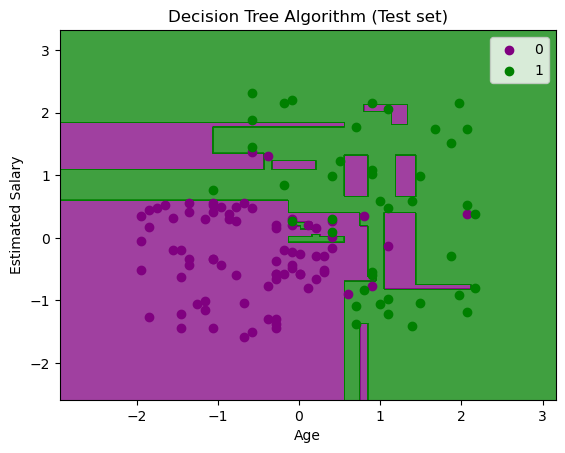

In [146]:
# Visualizing the test set result
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Decision Tree Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
